# 1. Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# 2. Splitting the data

In [2]:
MCI=pd.read_csv("MCI_30_Corrected.csv",index_col="DATE")
weather_y=MCI.pop("TMAX")
weather_x=MCI

In [3]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25,shuffle=False)

# 3. Models

# 3.1 Decision Tree

In [4]:
M1_regressor=DecisionTreeRegressor()
M1_regressor.fit(train_X,train_y)

DecisionTreeRegressor()

In [5]:
M1_prediction=M1_regressor.predict(test_X)

In [6]:
efs1 = EFS(M1_regressor, 
           min_features=1,
           max_features=5,
           scoring='r2',
           print_progress=True,
           n_jobs=-1,
           cv=10)

efs1 = efs1.fit(train_X, train_y)

Features: 31/31

In [7]:
print('Best subset:', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Best subset: (2, 4)
Best subset (corresponding names): ('SNOW', 'TMIN')


In [8]:
metric_dict1 = efs1.get_metric_dict(confidence_interval=0.95)
df1 = pd.DataFrame.from_dict(metric_dict1).T
df1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[-0.03067303489151607, 0.004983951861532887, -...",-0.014937,"(AWND,)",0.014644,0.019717,0.006572
1,"(1,)","[-0.028366620316573332, -9.360386668166853e-05...",-0.017728,"(PRCP,)",0.011371,0.01531,0.005103
2,"(2,)","[0.08937494716495831, 0.09960234767497389, 0.1...",0.095578,"(SNOW,)",0.01475,0.01986,0.00662
3,"(3,)","[0.12504437934330825, 0.1443015501990299, 0.12...",0.168713,"(SNWD,)",0.035833,0.048246,0.016082
4,"(4,)","[0.8658351246344446, 0.8658474310077658, 0.854...",0.868547,"(TMIN,)",0.008293,0.011166,0.003722
5,"(0, 1)","[-0.2657125744473925, -0.18133678550065113, -0...",-0.185875,"(AWND, PRCP)",0.0354,0.047664,0.015888
6,"(0, 2)","[0.0830560326327271, 0.10017665737980141, 0.10...",0.08638,"(AWND, SNOW)",0.018999,0.02558,0.008527
7,"(0, 3)","[0.11475780006242353, 0.1465728696254932, 0.13...",0.156515,"(AWND, SNWD)",0.037763,0.050844,0.016948
8,"(0, 4)","[0.7777376792319959, 0.7879551984973884, 0.784...",0.792696,"(AWND, TMIN)",0.012755,0.017174,0.005725
9,"(1, 2)","[0.0810104686823524, 0.09834697072257703, 0.08...",0.085618,"(PRCP, SNOW)",0.01976,0.026606,0.008869


In [9]:
sfs1 = SFS(M1_regressor, 
           k_features="best",
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)


sfs1 = sfs1.fit(train_X, train_y)

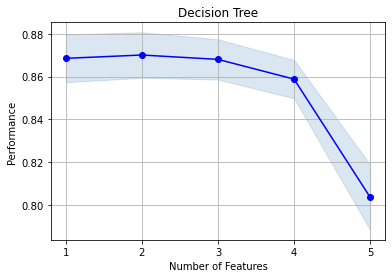

In [10]:
metric_dict11 = sfs1.get_metric_dict(confidence_interval=0.95)
fig1 = plot_sfs(metric_dict11, kind='std_dev')
plt.title('Decision Tree')
plt.grid()
plt.show()

In [11]:
print('Best subset:', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', weather_x.columns[:][list(sfs1.k_feature_idx_)])

Best subset: (2, 4)
Best subset (corresponding names): Index(['SNOW', 'TMIN'], dtype='object')


In [12]:
df11 = pd.DataFrame.from_dict(metric_dict11).T
df11

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.8658351246344446, 0.8658474310077658, 0.854...",0.868547,"(TMIN,)",0.008293,0.011166,0.003722
2,"(2, 4)","[0.8674366033236973, 0.86579935247621, 0.85422...",0.870097,"(SNOW, TMIN)",0.0079,0.010637,0.003546
3,"(2, 3, 4)","[0.8667448452907729, 0.8656247940224093, 0.852...",0.868055,"(SNOW, SNWD, TMIN)",0.006974,0.00939,0.00313
4,"(1, 2, 3, 4)","[0.8619569031274958, 0.8487350839818119, 0.843...",0.858833,"(PRCP, SNOW, SNWD, TMIN)",0.006644,0.008946,0.002982
5,"(0, 1, 2, 3, 4)","[0.799069604586892, 0.8028326954949343, 0.7864...",0.803652,"(AWND, PRCP, SNOW, SNWD, TMIN)",0.011331,0.015256,0.005085


# 3.2 Random Forest

In [13]:
M2_regressor=RandomForestRegressor()
M2_regressor.fit(train_X,train_y)

RandomForestRegressor()

In [14]:
M2_prediction=M2_regressor.predict(test_X)

In [15]:
efs2 = EFS(M2_regressor, 
           min_features=1,
           max_features=5,
           scoring='r2',
           print_progress=True,
           n_jobs=-1,
           cv=10)

efs2 = efs2.fit(train_X, train_y)

Features: 31/31

In [16]:
print('Best subset:', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Best subset: (1, 2, 3, 4)
Best subset (corresponding names): ('PRCP', 'SNOW', 'SNWD', 'TMIN')


In [17]:
metric_dict2 = efs2.get_metric_dict(confidence_interval=0.95)
df2 = pd.DataFrame.from_dict(metric_dict2).T
df2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[-0.028496835376109475, 0.003974995029947359, ...",-0.014886,"(AWND,)",0.014313,0.019272,0.006424
1,"(1,)","[-0.024099028161959524, 0.0020045214375078446,...",-0.013737,"(PRCP,)",0.010961,0.014758,0.004919
2,"(2,)","[0.08895346767991963, 0.09964260557016258, 0.1...",0.095886,"(SNOW,)",0.014789,0.019912,0.006637
3,"(3,)","[0.1253337511161512, 0.14457877713499712, 0.12...",0.168692,"(SNWD,)",0.035873,0.0483,0.0161
4,"(4,)","[0.8659455000639663, 0.8662665284543654, 0.854...",0.868557,"(TMIN,)",0.008324,0.011208,0.003736
5,"(0, 1)","[-0.10619909040234199, -0.045863910470881564, ...",-0.068984,"(AWND, PRCP)",0.019695,0.026517,0.008839
6,"(0, 2)","[0.08934307764563665, 0.107022987507986, 0.107...",0.093011,"(AWND, SNOW)",0.019136,0.025766,0.008589
7,"(0, 3)","[0.12242507238442002, 0.15043585984645536, 0.1...",0.163137,"(AWND, SNWD)",0.038684,0.052084,0.017361
8,"(0, 4)","[0.8151991400983034, 0.8253610688171165, 0.814...",0.830081,"(AWND, TMIN)",0.011112,0.014962,0.004987
9,"(1, 2)","[0.08448189820785224, 0.10179597351176783, 0.0...",0.091235,"(PRCP, SNOW)",0.01893,0.025488,0.008496


In [18]:
sfs2 = SFS(M2_regressor, 
           k_features="best",
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)

sfs2 = sfs2.fit(train_X, train_y)

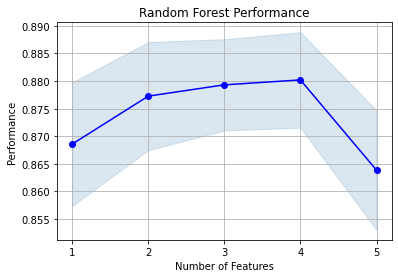

In [19]:
metric_dict22 = sfs2.get_metric_dict(confidence_interval=0.95)
fig1 = plot_sfs(metric_dict22, kind='std_dev')

plt.title('Random Forest Performance')
plt.grid()
plt.show()

In [21]:
print('Best subset:', sfs2.k_feature_idx_)
print('Best subset (corresponding names):', weather_x.columns[:][list(sfs2.k_feature_idx_)])

Best subset: (1, 2, 3, 4)
Best subset (corresponding names): Index(['PRCP', 'SNOW', 'SNWD', 'TMIN'], dtype='object')


In [22]:
df22 = pd.DataFrame.from_dict(metric_dict22).T
df22

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.8660726490459569, 0.8662186865024011, 0.854...",0.868579,"(TMIN,)",0.008295,0.011168,0.003723
2,"(1, 4)","[0.8858439390330234, 0.868062638983502, 0.8664...",0.877273,"(PRCP, TMIN)",0.007274,0.009793,0.003264
3,"(1, 2, 4)","[0.8863499183410555, 0.8739821689383428, 0.866...",0.879319,"(PRCP, SNOW, TMIN)",0.006147,0.008276,0.002759
4,"(1, 2, 3, 4)","[0.8882284677252086, 0.87387473735521, 0.86775...",0.880207,"(PRCP, SNOW, SNWD, TMIN)",0.006416,0.008638,0.002879
5,"(0, 1, 2, 3, 4)","[0.8674692869566826, 0.8589698082504406, 0.848...",0.863857,"(AWND, PRCP, SNOW, SNWD, TMIN)",0.008036,0.01082,0.003607


# 3.3 XGBoost

In [23]:
M3_regressor=xgb.XGBRegressor()
M3_regressor.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
M3_prediction=M3_regressor.predict(test_X)

In [25]:
efs3 = EFS(M3_regressor, 
           min_features=1,
           max_features=5,
           scoring='r2',
           print_progress=True,
           n_jobs=-1,
           cv=10)

efs3 = efs3.fit(train_X, train_y)

Features: 31/31

In [26]:
print('Best subset:', efs3.best_idx_)
print('Best subset (corresponding names):', efs3.best_feature_names_)

Best subset: (1, 2, 3, 4)
Best subset (corresponding names): ('PRCP', 'SNOW', 'SNWD', 'TMIN')


In [27]:
metric_dict3 = efs3.get_metric_dict(confidence_interval=0.95)
df3 = pd.DataFrame.from_dict(metric_dict3).T
df3

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[-0.030579543445308, 0.0052847031205643935, -0...",-0.014649,"(AWND,)",0.014379,0.01936,0.006453
1,"(1,)","[-0.025659591933637982, 0.00031082093068923733...",-0.014589,"(PRCP,)",0.01086,0.014622,0.004874
2,"(2,)","[0.08937612529338224, 0.09961034992540074, 0.1...",0.095583,"(SNOW,)",0.014751,0.019861,0.00662
3,"(3,)","[0.1250445976295158, 0.14430156498907765, 0.12...",0.168713,"(SNWD,)",0.035833,0.048246,0.016082
4,"(4,)","[0.8658350603362271, 0.8658003262400656, 0.854...",0.868544,"(TMIN,)",0.008294,0.011168,0.003723
5,"(0, 1)","[-0.07409019351416535, -0.015104305747467572, ...",-0.04693,"(AWND, PRCP)",0.015637,0.021054,0.007018
6,"(0, 2)","[0.08790809268806199, 0.10696958316058991, 0.1...",0.092063,"(AWND, SNOW)",0.018518,0.024933,0.008311
7,"(0, 3)","[0.11864497716966482, 0.15142959105362286, 0.1...",0.162726,"(AWND, SNWD)",0.038804,0.052247,0.017416
8,"(0, 4)","[0.8440558824747175, 0.8578703022756913, 0.845...",0.856374,"(AWND, TMIN)",0.008159,0.010985,0.003662
9,"(1, 2)","[0.08433285790844658, 0.10214160456819876, 0.0...",0.091763,"(PRCP, SNOW)",0.01907,0.025676,0.008559


In [28]:
sfs3 = SFS(M3_regressor, 
           k_features="best",
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)


sfs3 = sfs3.fit(train_X, train_y)

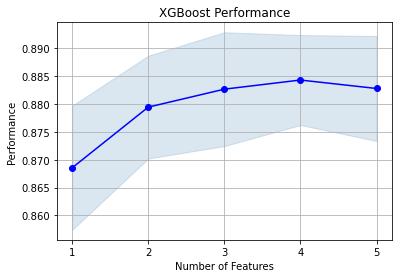

In [29]:
metric_dict33 = sfs3.get_metric_dict(confidence_interval=0.95)
fig1 = plot_sfs(metric_dict33, kind='std_dev')

plt.title('XGBoost Performance')
plt.grid()
plt.show()

In [30]:
print('Best subset:', sfs3.k_feature_idx_)
print('Best subset (corresponding names):', weather_x.columns[:][list(sfs3.k_feature_idx_)])

Best subset: (1, 2, 3, 4)
Best subset (corresponding names): Index(['PRCP', 'SNOW', 'SNWD', 'TMIN'], dtype='object')


In [31]:
df33 = pd.DataFrame.from_dict(metric_dict33).T
df33

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.8658350603362271, 0.8658003262400656, 0.854...",0.868544,"(TMIN,)",0.008294,0.011168,0.003723
2,"(1, 4)","[0.8873067823182711, 0.8681703624234409, 0.872...",0.879454,"(PRCP, TMIN)",0.006866,0.009244,0.003081
3,"(1, 3, 4)","[0.8890827310282938, 0.8703214933368528, 0.873...",0.882684,"(PRCP, SNWD, TMIN)",0.007602,0.010235,0.003412
4,"(1, 2, 3, 4)","[0.8915603483806731, 0.8764310684018158, 0.876...",0.884326,"(PRCP, SNOW, SNWD, TMIN)",0.006008,0.008089,0.002696
5,"(0, 1, 2, 3, 4)","[0.878306599401135, 0.8763537159668217, 0.8706...",0.882805,"(AWND, PRCP, SNOW, SNWD, TMIN)",0.007012,0.009441,0.003147
